# Make figures

To run this notebook, the GWP notebook must first be run (for the base case, and adjust drydep to 80 and 50 Tg/yr)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))

plt.rcParams.update({'font.size': 25})
colorlist = ['C1','C2','C3','C4','C5','C6']

color_h2 = 'lightblue'
color_ch4 = 'lightseagreen'
color_h2o = 'darkviolet'
color_o3 = 'gold'

model_dict = { 'OSLOCTM3':'OsloCTM3',
               'WACCM6-2deg':'WACCM',
               'INCA':'INCA',
               'GFDL-emi':'GFDL'}

In [2]:
filepath= r"./output/"
df_drydep80_table_per_flux = pd.read_csv(filepath+'drydep_80_table_per_flux_h2.csv',index_col=0)
df_drydep80_table_per_flux.rename(model_dict, inplace=True)
df_drydep50_table_per_flux = pd.read_csv(filepath+'drydep_50_table_per_flux_h2.csv',index_col=0)
df_drydep50_table_per_flux.rename(model_dict, inplace=True)
df_table_per_flux = pd.read_csv(filepath+'table_per_flux_h2.csv',index_col=0)
#Making modellist with shorter names
df_table_per_flux.rename(model_dict, inplace=True)
modellist = df_table_per_flux.index
df_table_per_flux

,deltaH2,surf_h2_per_h2_flux,surf_ch4_per_h2_flux,ch4_flux_per_h2_flux,ch4_rf_per_h2_flux,trop_du_ozone_per_h2_flux,strat_du_ozone_per_h2_flux,strat_du_6060_ozone_per_h2_flux,strat_du_gt60_ozone_per_h2_flux,ozone_rf_per_h2_flux,h2o_rf_per_h2_flux
OsloCTM3,8.54,6.23,1.08,0.31,0.48,0.00,-0.00,0.00,0.00,0.22,0.17
WACCM,9.93,5.36,1.14,0.33,0.50,0.00,0.00,0.00,0.00,0.17,0.02
INCA,7.19,7.39,1.17,0.29,0.52,0.00,-0.00,-0.00,-0.00,0.16,0.06
GFDL,196,6.86,1.00,0.23,0.44,0.00,-0.00,-0.00,-0.00,0.17,0.14


## Surface H2 concentration by 1 Tg H2/yr

In [3]:
tittel = 'Surface H$_2$ per H$_2$ flux'
ytittel ='[ppb H2/(Tg H2 yr-1)]'
field = 'surf_h2_per_h2_flux'
legend = False #False

In [4]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

plot_values

OsloCTM3   6.23
WACCM      5.36
INCA       7.39
GFDL       6.86
Name: surf_h2_per_h2_flux, dtype: float64

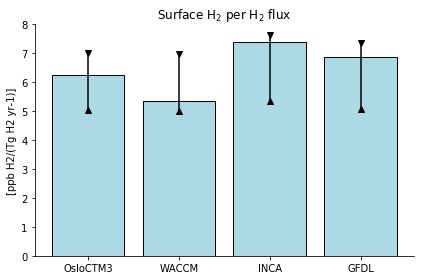

In [5]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):

    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_h2,label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
#plt.tick_params(labelbottom = False, bottom = False)
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=0)
plt.tight_layout()
plt.savefig('output/Surface_H2_per_H2_flux.png', transparent=True)

## Methane flux by 1 Tg H2/yr

In [6]:
tittel = 'Methane flux per H$_2$ flux'
ytittel ='[Tg CH4/Tg H2]'
field = 'ch4_flux_per_h2_flux'
legend = False #False

In [7]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

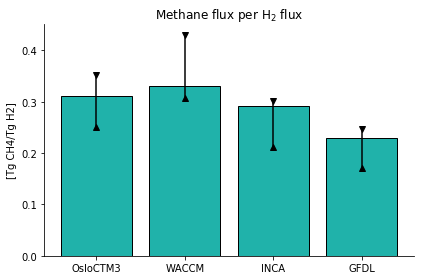

In [8]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_ch4,label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=0)
plt.tight_layout()
plt.savefig('output/CH4_flux_per_H2_flux.png', transparent=True)

## Methane RF per flux

In [9]:
tittel = 'Methane RF per H$_2$ flux'
ytittel ='[mW m-2/(Tg H2 yr$^{-1}$)]'
field = 'ch4_rf_per_h2_flux'
legend = False


In [10]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

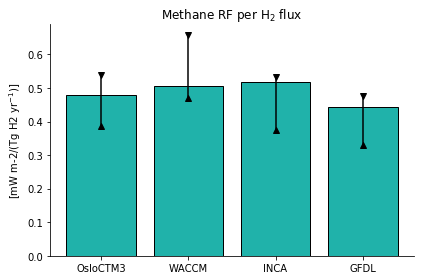

In [11]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):

    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_ch4,label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=0)
plt.tight_layout()
plt.savefig('output/CH4_RF_per_H2_flux.png', transparent=True)

## Tropospheric ozone by H2 flux

In [12]:
tittel = 'Tropospheric ozone per H$_2$ flux'
ytittel ='[DU /(Tg H2 yr-1)]'
field = 'trop_du_ozone_per_h2_flux'
legend = False

For the following figures, add the methane induced effect

In [13]:
#Indirect effect via Methane.
df_drydep80_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_80_table_per_flux_ch4.csv',index_col=0)
df_drydep80_table_per_flux_ch4.rename(model_dict, inplace=True)
df_drydep50_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_50_table_per_flux_ch4.csv',index_col=0)
df_drydep50_table_per_flux_ch4.rename(model_dict, inplace=True)
df_table_per_flux_ch4 = pd.read_csv(filepath+'table_per_flux_ch4.csv',index_col=0)
df_table_per_flux_ch4.rename(model_dict, inplace=True)

In [14]:
field_ch4 = field.replace('h2_','ch4_')
print(field)
print(field_ch4)

trop_du_ozone_per_h2_flux
trop_du_ozone_per_ch4_flux


In [15]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]
plot_values
#print(plot_values_max_dry)
#print(plot_values_min_dry)

OsloCTM3   0.00
WACCM      0.00
INCA       0.00
GFDL       0.00
Name: trop_du_ozone_per_h2_flux, dtype: float64

In [16]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [17]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_trop.txt'
df_ozone_du_trop = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
df_ozone_du_trop.index.name = None
df_ozone_du_trop.rename(columns=model_dict, inplace=True)

#This should be tropospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL'] = df_ozone_du_trop['GFDL'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL']
plot_values_max_dry_ch4['GFDL'] = df_ozone_du_trop['GFDL'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL']
plot_values_min_dry_ch4['GFDL'] = df_ozone_du_trop['GFDL'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL']




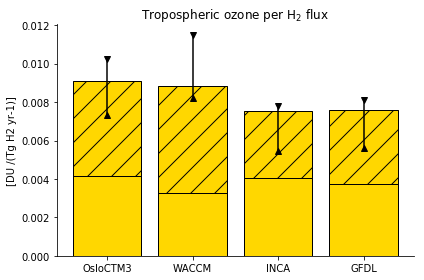

In [18]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_o3,color=color_o3,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=0)
plt.tight_layout()
plt.savefig('output/Trop_Ozone_RF_per_H2_flux.png', transparent=True)

## Stratospheric ozone by H2 flux

In [19]:
tittel = 'Stratospheric ozone per H$_2$ flux'
ytittel ='[DU /(Tg H2 yr-1)]'
field = 'strat_du_ozone_per_h2_flux'
legend = False #False

In [20]:
field_ch4 = field.replace('h2_','ch4_')

In [21]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [22]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [23]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_strat.txt'
df_ozone_du_strat = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
df_ozone_du_strat.index.name = None
df_ozone_du_strat.rename(columns=model_dict, inplace=True)
#This should be stratospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL'] = df_ozone_du_strat['GFDL'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL']
plot_values_max_dry_ch4['GFDL'] = df_ozone_du_strat['GFDL'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL']
plot_values_min_dry_ch4['GFDL'] = df_ozone_du_strat['GFDL'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL']



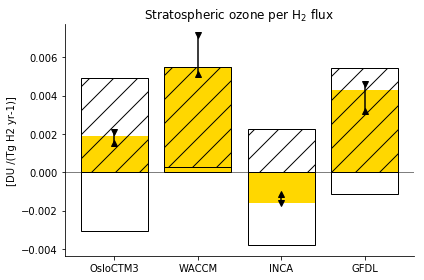

In [24]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_o3,color=color_o3,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=0)
plt.tight_layout()
plt.savefig('output/Strat_Ozone_RF_per_H2_flux.png', transparent=True)

## Stratospheric ozone 60S to 60N by H2 flux

In [25]:
tittel = 'Stratospheric ozone per H$_2$ flux 60S to 60N'
ytittel ='[DU /(Tg H2 yr-1)]'
field = 'strat_du_6060_ozone_per_h2_flux'
legend = False #False

In [26]:
field_ch4 = field.replace('h2_','ch4_')

In [27]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [28]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [29]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_strat_6060.txt'
df_ozone_du_strat_6060 = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
df_ozone_du_strat_6060.index.name = None
df_ozone_du_strat_6060.rename(columns=model_dict, inplace=True)
#This should be stratospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL'] = df_ozone_du_strat_6060['GFDL'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL']
plot_values_max_dry_ch4['GFDL'] = df_ozone_du_strat_6060['GFDL'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL']
plot_values_min_dry_ch4['GFDL'] = df_ozone_du_strat_6060['GFDL'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL']


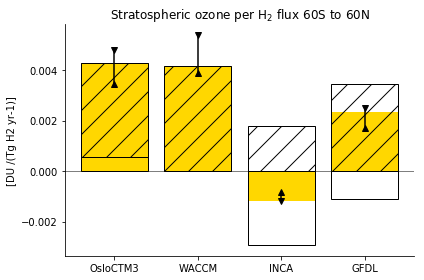

In [30]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_o3,color=color_o3,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=0)
plt.tight_layout()
plt.savefig('output/Strat_H2O_RF_per_H2_flux.png', transparent=True)
plt.savefig('output/Strat_Ozone_RF_per_H2_flux_from_60S_to_60N.png', transparent=True)

### Stratospheric ozone <60S and >60N by H2 flux

In [31]:
tittel = 'Stratospheric ozone per H$_2$ flux <60S and >60N'
ytittel ='[DU /(Tg H2 yr-1)]'
field = 'strat_du_gt60_ozone_per_h2_flux'
legend = False #False

In [32]:
field_ch4 = field.replace('h2_','ch4_')

In [33]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [34]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [35]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_strat_gt60.txt'
df_ozone_du_strat_gt60 = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
df_ozone_du_strat_gt60.index.name = None
df_ozone_du_strat_gt60.rename(columns=model_dict, inplace=True)
#This should be stratospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL'] = df_ozone_du_strat_gt60['GFDL'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL']
plot_values_max_dry_ch4['GFDL'] = df_ozone_du_strat_gt60['GFDL'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL']
plot_values_min_dry_ch4['GFDL'] = df_ozone_du_strat_gt60['GFDL'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL']


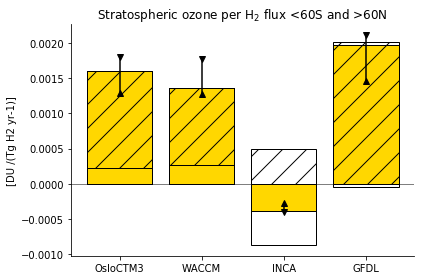

In [36]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=color_o3,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=0)
plt.tight_layout()
plt.savefig('output/Strat_Ozone_RF_per_H2_flux_below_60S_and_above_60N.png', transparent=True)

## Ozone RF by 1 Tg H2

In [37]:
tittel = 'Ozone RF per H$_2$ flux'
ytittel ='[mW m-2/(Tg H2 yr-1)]'
field = 'ozone_rf_per_h2_flux'
legend = False #False

In [38]:
field_ch4 = field.replace('h2_','ch4_')

In [39]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [40]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']

In [41]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_rf.txt'
df_ozone_rf = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
df_ozone_rf.index.name = None
df_ozone_rf.rename(columns=model_dict, inplace=True)
#This should be ozone RF in H2+CH4 minus H2. 
plot_values_ch4['GFDL'] = df_ozone_rf['GFDL'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL']
plot_values_max_dry_ch4['GFDL'] = df_ozone_rf['GFDL'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL']
plot_values_min_dry_ch4['GFDL'] = df_ozone_rf['GFDL'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL']



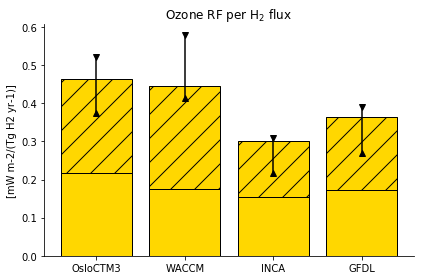

In [42]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):  
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_o3,color=color_o3,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=0)
plt.tight_layout()
plt.savefig('output/Ozone_RF_per_H2_flux.png', transparent=True)

## Strat. H2O RF by 1 Tg H2

In [43]:
tittel = 'Stratospheric H$_2$O RF per H$_2$ flux'
ytittel ='[mW m$^{-2}$/(Tg H2 yr$^{-1}$)]'
field = 'h2o_rf_per_h2_flux'
legend = False

In [44]:
field_ch4 = field.replace('h2_','ch4_')

In [45]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [46]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']

In [47]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'H2O_rf_gfdl.txt'
df_h2o_rf = pd.read_csv(inputpath+file, sep=',',index_col=0,header=0)

gfdl_emi_ch4 = df_h2o_rf.loc['H2+CH4 [mW m-2]'] - df_h2o_rf.loc['H2 [mW m-2]']

#gfdl_emi_ch4
plot_values_ch4['GFDL'] = gfdl_emi_ch4/df_table_per_flux['deltaH2'].loc['GFDL']
plot_values_max_dry_ch4['GFDL'] = gfdl_emi_ch4/df_drydep80_table_per_flux['deltaH2'].loc['GFDL']
plot_values_min_dry_ch4['GFDL'] = gfdl_emi_ch4/df_drydep50_table_per_flux['deltaH2'].loc['GFDL']


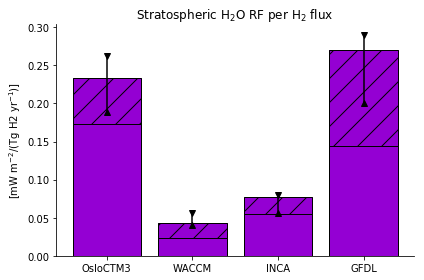

In [48]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_h2o,color=color_h2o,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=0)
plt.tight_layout()
plt.savefig('output/Strat_H2O_RF_per_H2_flux.png', transparent=True)